In [1]:
import os
import numpy as np
import pandas as pd
import networkx as nx
import seaborn as sns
import random
from random import choice
import pylab as plt
from matplotlib import pyplot as plt

In [2]:
os.chdir("C:\\Users\\alex\\Desktop\\Project 9- Virtual world Data Analysis\\dataverse_files\\csv")

In [3]:
y=pd.read_csv('campaigns.csv',sep=";",nrows=4712,engine='python',names=[0,1,2,3],usecols=(0,1,2,3))

In [4]:
y=y[4275:4711]    

In [5]:
G=nx.from_pandas_dataframe(y,source=2, target=3,edge_attr=True,create_using=nx.DiGraph())

In [6]:
G1=nx.from_pandas_dataframe(y,source=2, target=3,edge_attr=True)

In [31]:
G1.order()

437

In [8]:
s = pd.Series(pd.date_range('2011-12-24 07:54:00','2012-07-15 08:47:00',freq='20D'))

In [9]:
s[1]

Timestamp('2012-01-13 07:54:00')

In [10]:
y[1]=y[1].as_matrix()

In [11]:
y[1]= pd.to_datetime(y[1])

In [12]:
Time=[]
for i in range(10):
    Time.append(y.loc[(y[1]>=s[i])&(y[1]<s[i+1])])

In [13]:
X=[]
for i in range(10):
    X.append(nx.from_pandas_dataframe(Time[i],source=2, target=3,edge_attr=True,create_using=nx.DiGraph()))

In [14]:
X1=[]
for i in range(10):
    X1.append(nx.from_pandas_dataframe(Time[i],2,3))

In [15]:
for i in range(10):
    print(X[i].order(),X[i].size())

372 371
22 16
10 6
22 16
17 12
11 8
4 3
0 0
3 2
2 1


In [16]:
Y=[]
for node in G:
    d = G.out_degree(node)
    if (d>1):
        Y.append([node,d])
L=[]
Y=sorted(Y, key=lambda x: x[1], reverse=True)
Y=Y[:100]
print(Y)
for u in [p[0] for p in Y]:
    L.append(u)
print("\nUsers who were most active in campaign 4: ")
print(L)

[[20685, 22], [20738, 16], [20818, 16], [20864, 16], [20693, 14], [20690, 13], [20734, 13], [20837, 13], [20911, 12], [20722, 11], [20697, 7], [20753, 7], [20883, 7], [20713, 6], [20859, 6], [20974, 6], [20699, 5], [20745, 5], [20831, 5], [20899, 5], [20687, 4], [20700, 4], [20712, 4], [20733, 4], [20749, 4], [20759, 4], [20777, 4], [20833, 4], [20893, 4], [20953, 4], [20957, 4], [20967, 4], [21000, 4], [21025, 4], [20684, 3], [20706, 3], [20711, 3], [20771, 3], [20774, 3], [20809, 3], [20853, 3], [20865, 3], [20878, 3], [20915, 3], [20929, 3], [20994, 3], [21007, 3], [21034, 3], [21060, 3], [21062, 3], [20689, 2], [20691, 2], [20703, 2], [20709, 2], [20707, 2], [20708, 2], [20716, 2], [20719, 2], [20729, 2], [20736, 2], [20740, 2], [20743, 2], [20760, 2], [20769, 2], [20772, 2], [20775, 2], [20779, 2], [20791, 2], [20836, 2], [20870, 2], [20874, 2], [20916, 2], [20936, 2], [20971, 2], [21038, 2], [21041, 2], [21055, 2], [21097, 2]]

Users who were most active in campaign 4: 
[20685, 2

In [17]:
F=[]
for i in range(10):
    Y=[] 
    for node in X[i]: 
        d = X[i].degree(node)
        Y.append([node,d])
    F.append(Y)

In [18]:
s=s.apply(lambda x: x.strftime('%Y-%m-%d %H:%M:%S'))

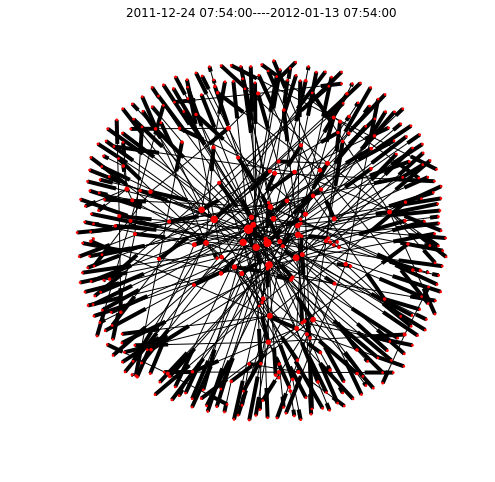

Number of nodes in graph: 372
Diameter: 20
Radius: 10


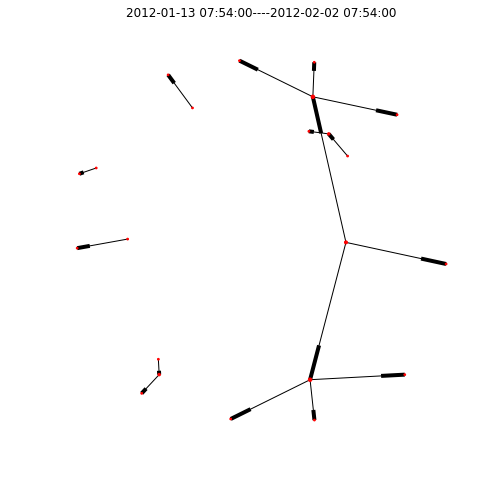

Number of nodes in graph: 22


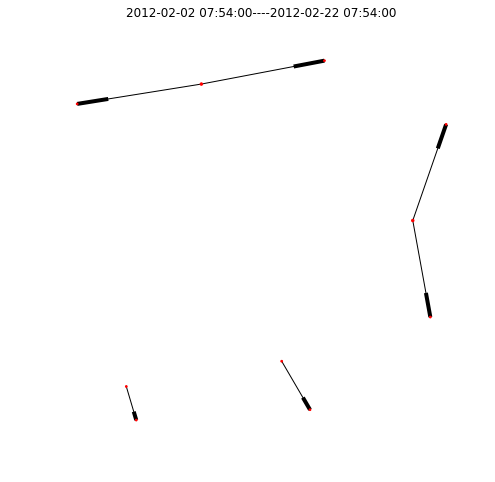

Number of nodes in graph: 10


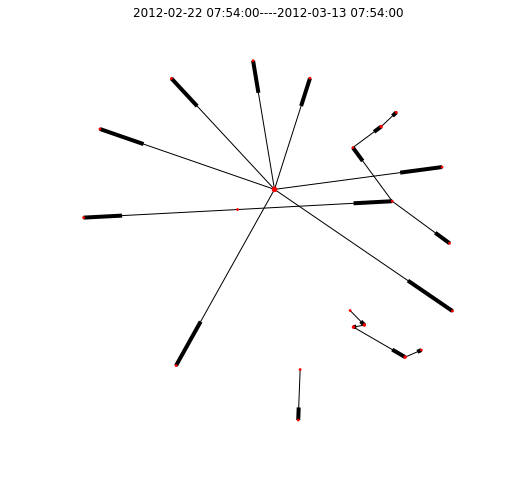

Number of nodes in graph: 22


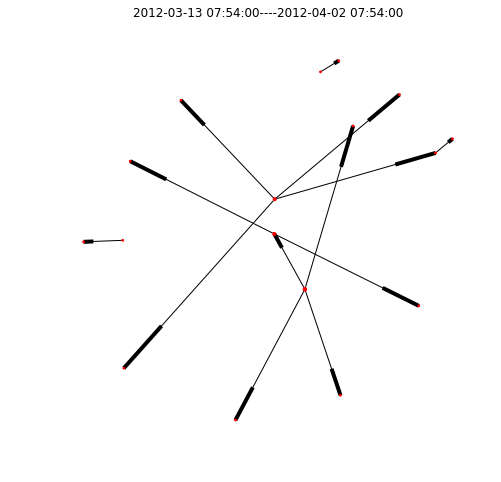

Number of nodes in graph: 17


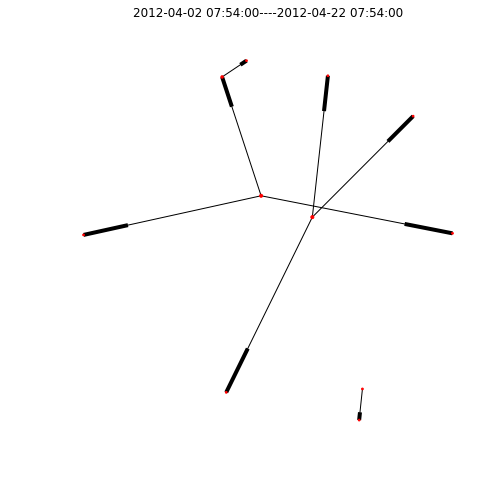

Number of nodes in graph: 11


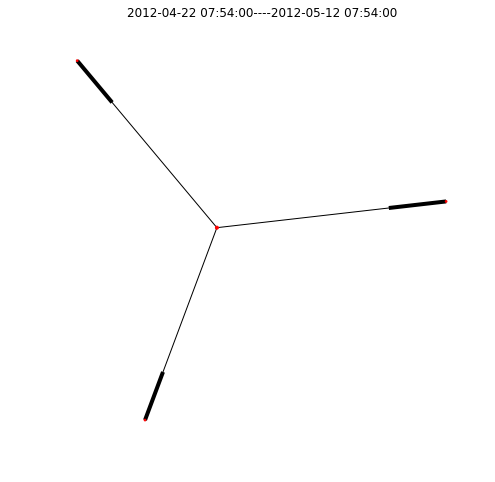

Number of nodes in graph: 4

On the interval >2012-05-12 07:54:00----2012-06-01 07:54:00< we dont have active campaign!!


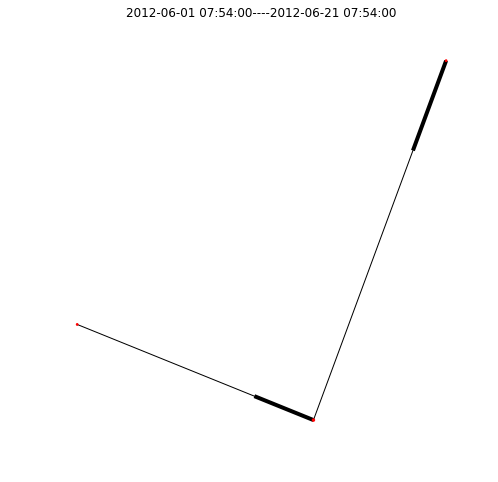

Number of nodes in graph: 3


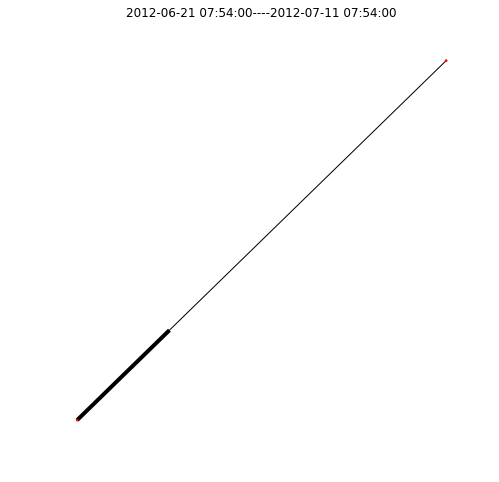

Number of nodes in graph: 2


In [19]:
S=[]
d=[]
r=[]
for i in range(10):
    V= G.subgraph(X[i])
    if(V.order()==0):
        print("\nOn the interval >"+s[i]+"----"+s[i+1]+"< we dont have active campaign!!") 
    else:
        V= G.subgraph(X[i])
        deg=nx.degree(V)
        pos = nx.spring_layout(V)
        plt.figure(1,figsize=(8,8)) 
        nx.draw_networkx_edges(V,pos, edge_color='k',arrows=True)           
        nx.draw_networkx_nodes(V, pos,nodelist=[p[0] for p in F[i]],node_size=[v * 3 for v in [p[1] for p in F[i]]],node_color='r')
        plt.title(s[i]+'----'+s[i+1])
        plt.axis('off')
        plt.show()
        print("Number of nodes in graph: %d" %V.order())
        S.append(max(nx.connected_component_subgraphs(X1[i]),key=len))
        if(i==0):
            d.append(nx.diameter(S[i]))
            print("Diameter:", d[i])
            r.append(nx.radius(S[i]))                         
            print("Radius:", r[i])

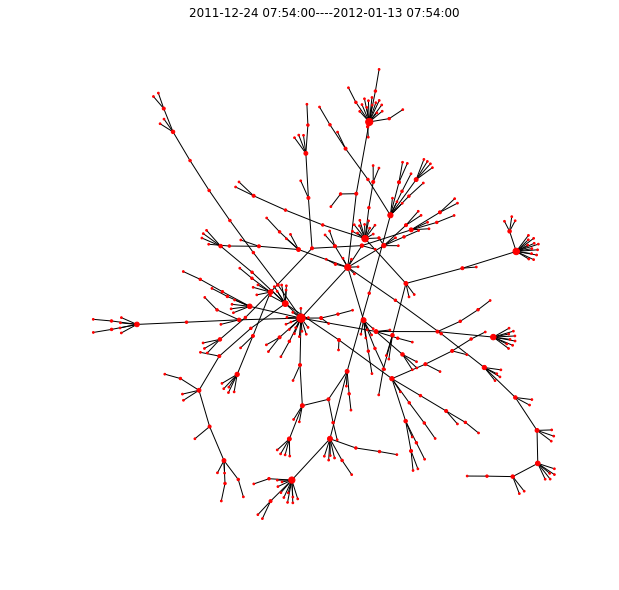

Number of nodes in graph: 372
Diameter: 20
Radius: 10


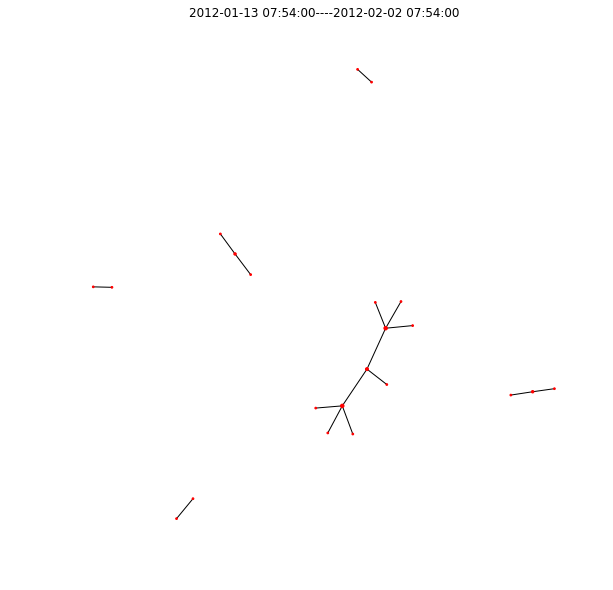

Number of nodes in graph: 22


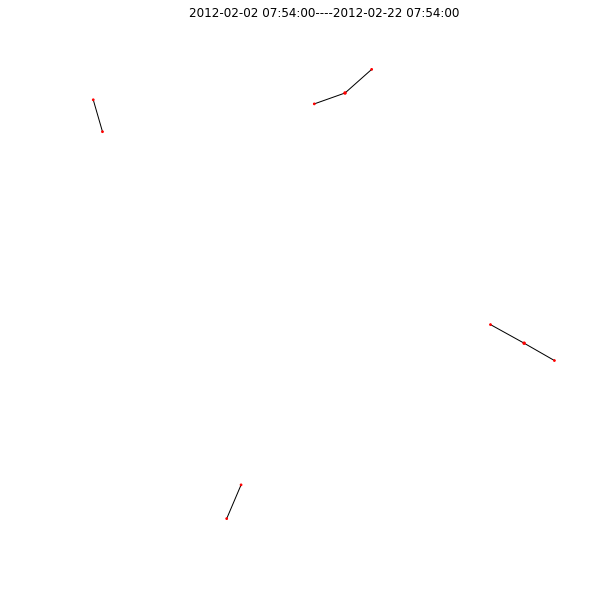

Number of nodes in graph: 10


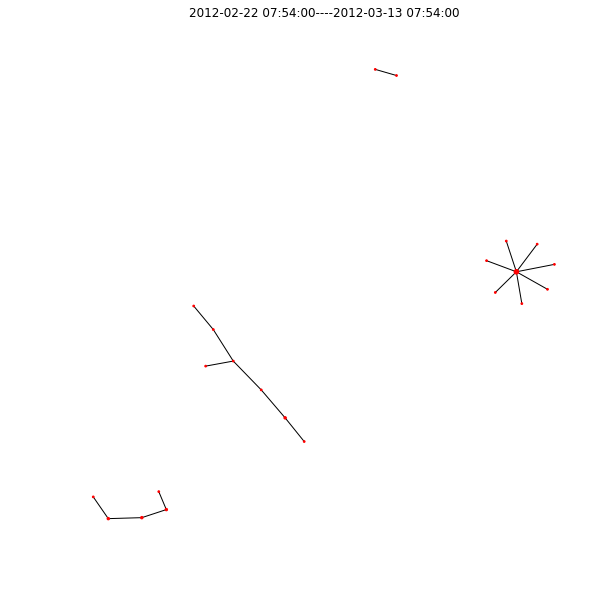

Number of nodes in graph: 22


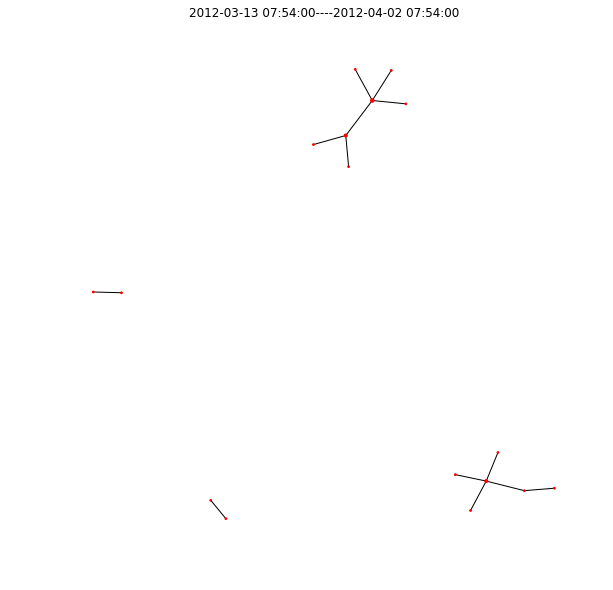

Number of nodes in graph: 17


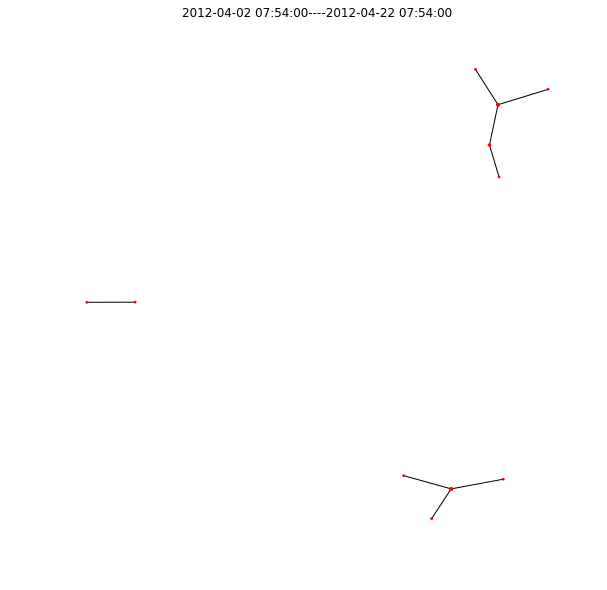

Number of nodes in graph: 11


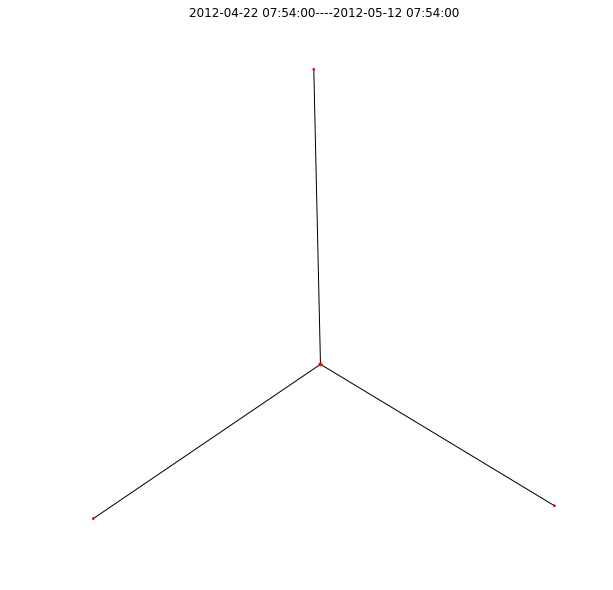

Number of nodes in graph: 4

On the interval >2012-05-12 07:54:00----2012-06-01 07:54:00< we dont have active campaign!!


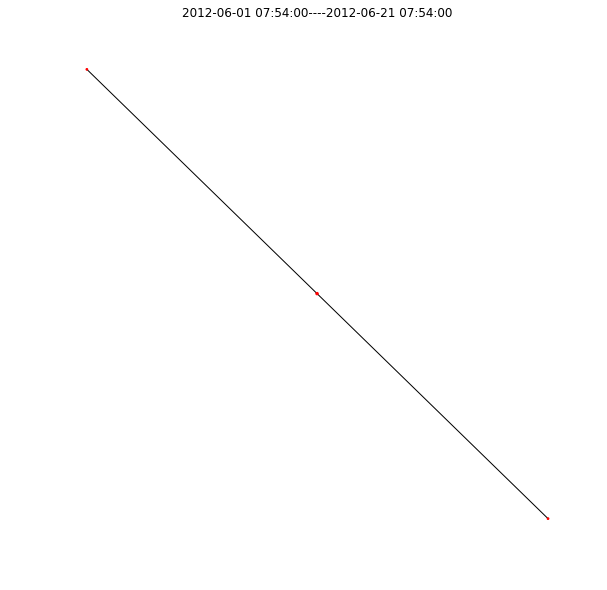

Number of nodes in graph: 3


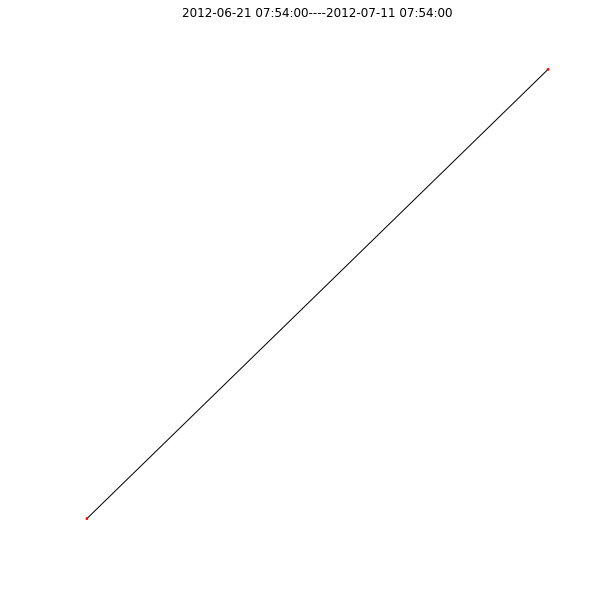

Number of nodes in graph: 2


In [20]:
S=[]
d=[]
r=[]
for i in range(10):
    V= G1.subgraph(X[i])
    if(V.order()==0):
        print("\nOn the interval >"+s[i]+"----"+s[i+1]+"< we dont have active campaign!!") 
    else:
        V= G1.subgraph(X[i])
        deg=nx.degree(V)
        pos = nx.spring_layout(V)
        plt.figure(1,figsize=(10,10)) 
        nx.draw_networkx_edges(V,pos, edge_color='k',arrows=True)           
        nx.draw_networkx_nodes(V, pos,nodelist=[p[0] for p in F[i]],node_size=[v * 3 for v in [p[1] for p in F[i]]],node_color='r')
        plt.title(s[i]+'----'+s[i+1])
        plt.axis('off')
        plt.show()
        print("Number of nodes in graph: %d" %V.order())
        S.append(max(nx.connected_component_subgraphs(X1[i]),key=len))
        if(i==0):
            d.append(nx.diameter(S[i]))
            print("Diameter:", d[i])
            r.append(nx.radius(S[i]))                         
            print("Radius:", r[i])

In [21]:
Y=[]
for node in X[0]:
    d = X[0].out_degree(node)
    if (d>1):
        Y.append([node,d])
L=[]
Y=sorted(Y, key=lambda x: x[1], reverse=True)
Y=Y[:20]
print(Y)
for u in [p[0] for p in Y]:
    L.append(u)
print("\nUsers most active in campaign 4: ")
print(len(L))

[[20685, 22], [20738, 16], [20734, 13], [20837, 13], [20693, 12], [20911, 12], [20690, 10], [20722, 9], [20864, 8], [20697, 7], [20883, 7], [20713, 6], [20753, 6], [20859, 6], [20974, 6], [20699, 5], [20745, 5], [20831, 5], [20899, 5], [20687, 4]]

Users most active in campaign 4: 
20


In [22]:
D=[]
L.append(20682)
for i in L:
    for j in L:
        if(i!=j):
            if(i not in D):
                D.append(i)
            if(j not in D):
                D.append(j)
            if(nx.has_path(X[0],i,j)==True):
                for k in nx.shortest_path(X[0],i,j):
                    if(k not in D):
                        D.append(k)
            else:
                continue            
print(len(D))
print(D)

42
[20685, 20738, 20693, 20719, 20734, 20699, 20732, 20837, 20759, 20836, 20911, 20729, 20733, 20772, 20833, 20883, 20690, 20722, 20687, 20709, 20864, 20838, 20697, 20713, 20706, 20708, 20753, 20859, 20974, 20705, 20862, 20899, 20953, 20967, 20745, 20743, 20831, 20736, 20682, 20683, 20684, 20773]


In [23]:
V2= G1.subgraph(D)

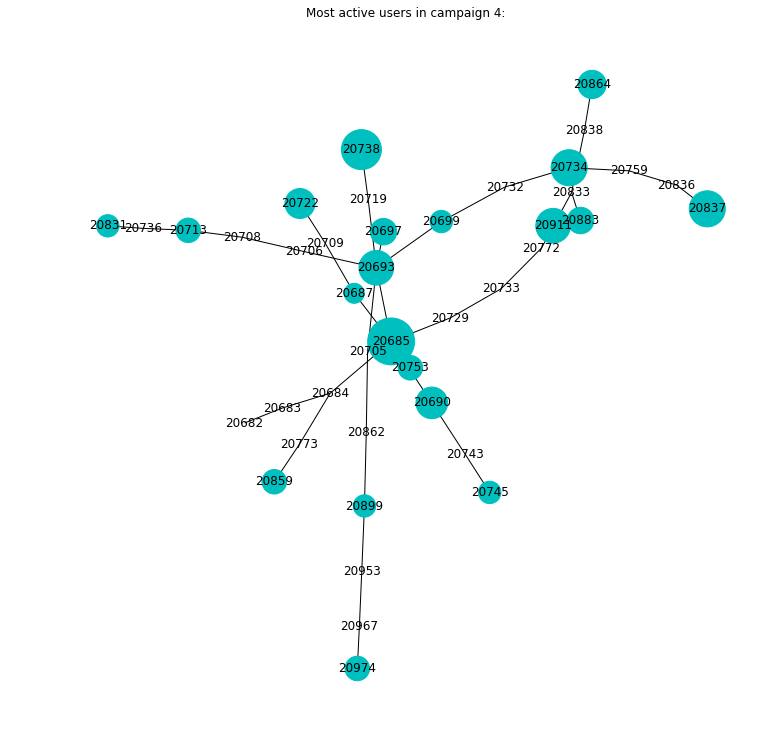

In [24]:
pos = nx.spring_layout(V2)
plt.figure(1,figsize=(13,13))     
nx.draw_networkx_edges(V2,pos, edge_color='k',arrows=True)
nx.draw_networkx_nodes(V2, pos,nodelist=[p[0] for p in Y],node_size=[v * 100 for v in [p[1] for p in Y]],node_color='c')
nx.draw_networkx_labels(V2,pos,with_labels=True)
plt.axis('off')
plt.title("Most active users in campaign 4: ")
plt.show()

In [25]:
s1 = pd.Series(pd.date_range('2011-12-24 07:54:00','2012-01-05 07:54:00',freq='1D'))

In [26]:
s1[10]

Timestamp('2012-01-03 07:54:00')

In [27]:
y[1]=y[1].as_matrix()
y[1]= pd.to_datetime(y[1])
s1=s1.apply(lambda x: x.strftime('%Y-%m-%d %H:%M:%S'))

In [28]:
Time2=[]
for i in range(10):
    Time2.append(y.loc[(y[1]>=s1[i])&(y[1]<=s1[i+1])])
X2=[]
for i in range(10):
    X2.append(nx.from_pandas_dataframe(Time2[i],source=2, target=3,edge_attr=True,create_using=nx.DiGraph())) 
for i in range(10):
    print(X2[i].order(),X2[i].size())

140 139
100 79
65 42
55 39
31 19
0 0
10 5
28 19
11 7
4 2


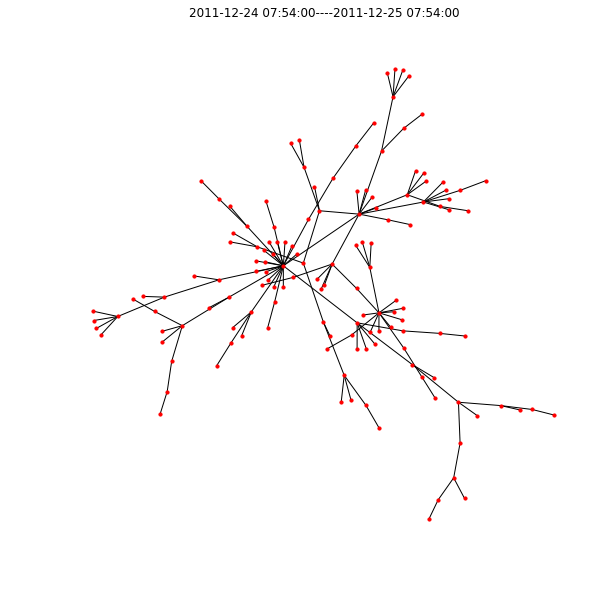

Number of nodes in graph: 140
Diameter: 14
Radius: 7


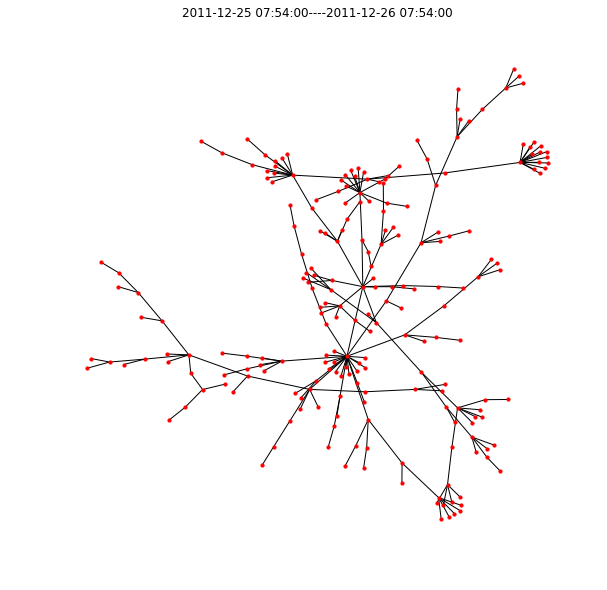

Number of nodes in graph: 219
Diameter: 15
Radius: 8


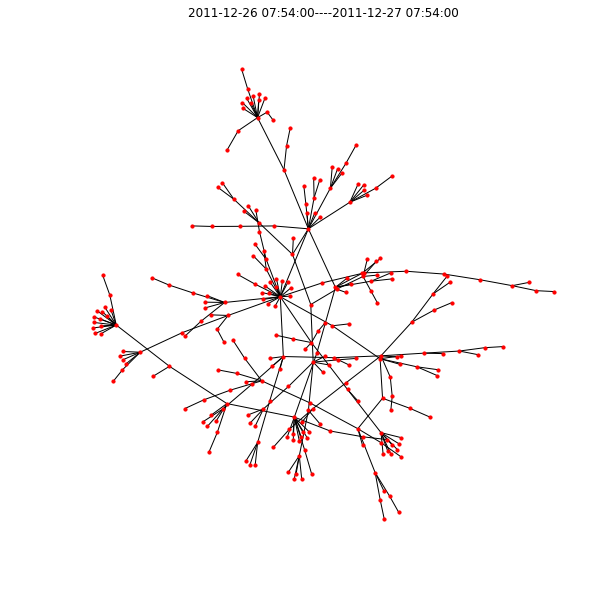

Number of nodes in graph: 261
Diameter: 18
Radius: 9


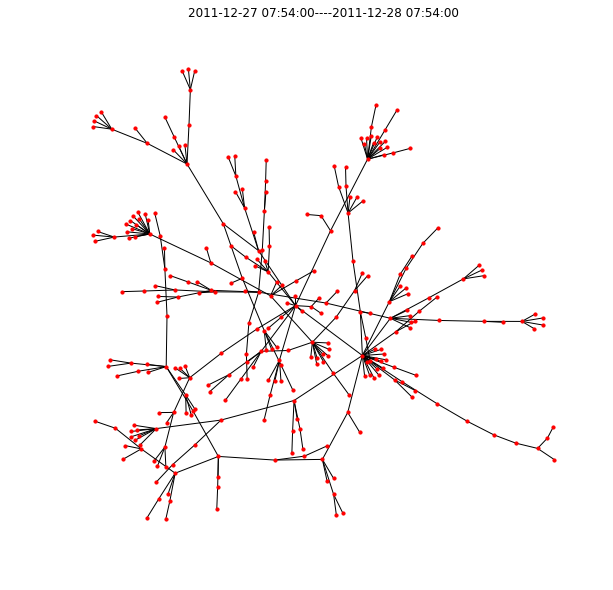

Number of nodes in graph: 300
Diameter: 19
Radius: 10


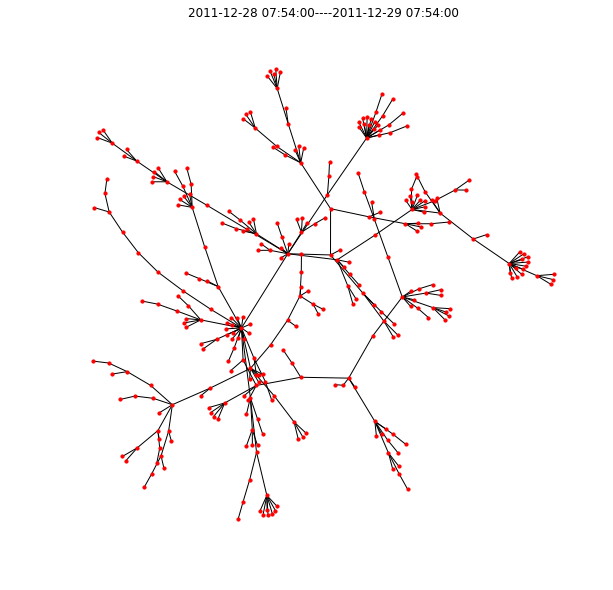

Number of nodes in graph: 319
Diameter: 19
Radius: 10


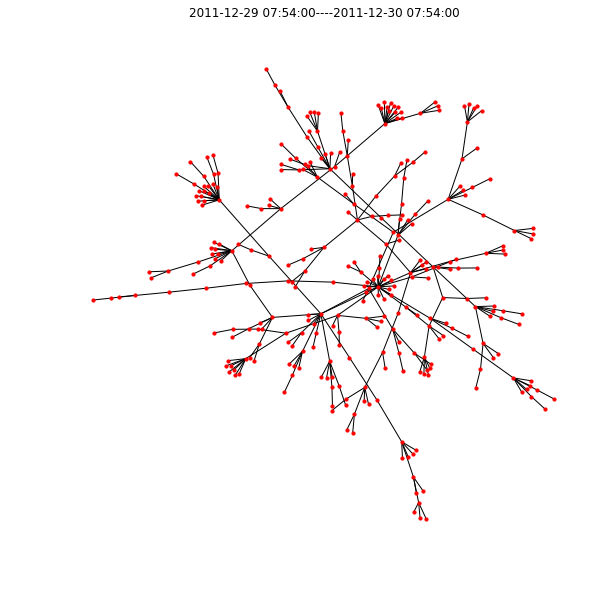

Number of nodes in graph: 319
Diameter: 19
Radius: 10


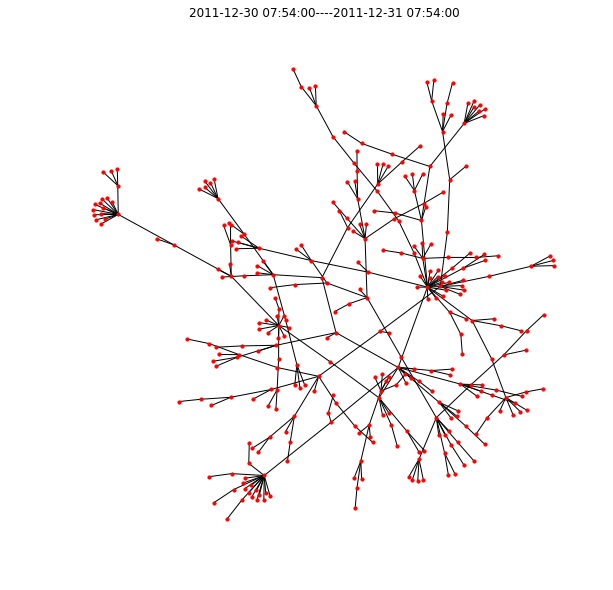

Number of nodes in graph: 324
Diameter: 19
Radius: 10


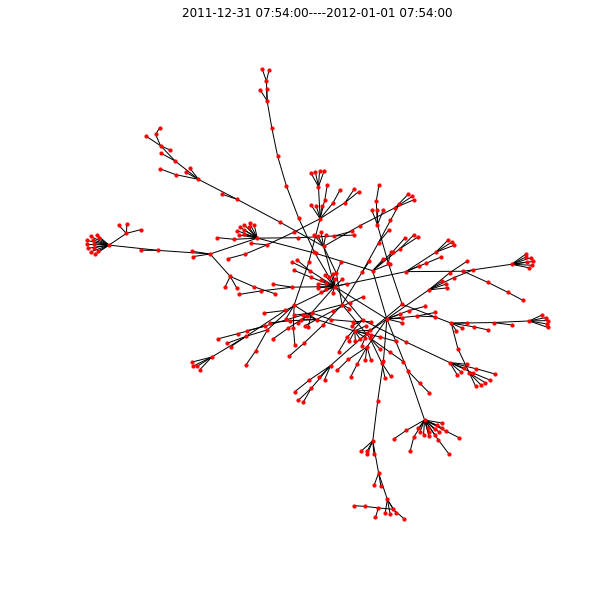

Number of nodes in graph: 343
Diameter: 20
Radius: 10


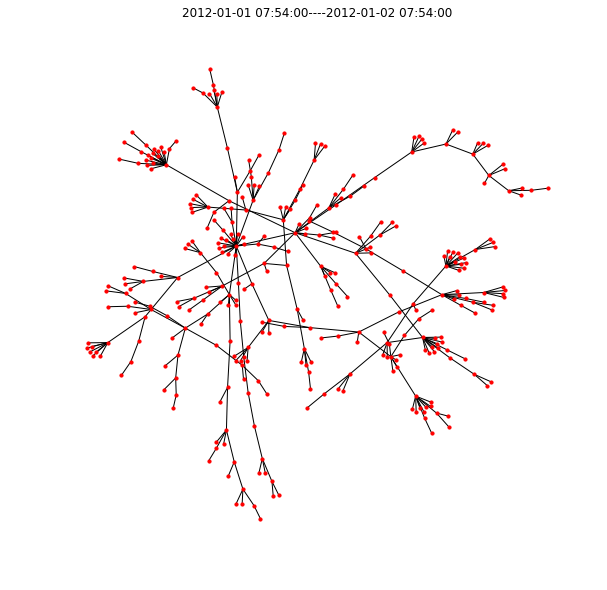

Number of nodes in graph: 350
Diameter: 20
Radius: 10


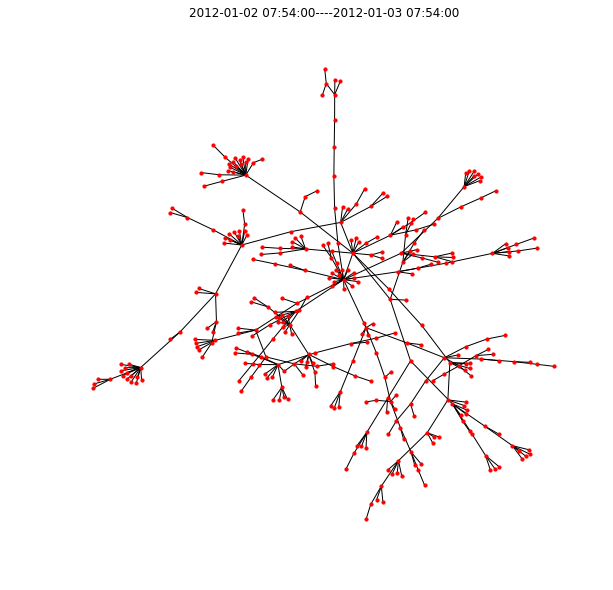

Number of nodes in graph: 352
Diameter: 20
Radius: 10


In [30]:
S=[]
d=[]
r=[]
P=nx.Graph()
for i in range(10):
    for j in range(i+1):
        P=nx.compose(P,X2[j])
    V= G1.subgraph(P)
    pos = nx.spring_layout(V)
    plt.figure(1,figsize=(10,10)) 
    nx.draw_networkx_edges(V,pos, edge_color='k',arrows=True)
    nx.draw_networkx_nodes(V,pos, node_size=10,node_color='r')
    plt.title(s1[i]+'----'+s1[i+1])
    plt.axis('off')
    plt.savefig('c4'+str(i+1)+'.png')
    plt.show()
    S.append(max(nx.connected_component_subgraphs(V),key=len))
    print("Number of nodes in graph: %d" %V.order())
    d.append(nx.diameter(S[i]))
    print("Diameter:", d[i])
    r.append(nx.radius(S[i]))                         
    print("Radius:", r[i])